# Jupyter Notebook Bab 9: Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (Edisi ke-2)

## Teknik Pembelajaran Tanpa Pengawasan (Unsupervised Learning Techniques)

Bab ini akan membahas teknik-teknik pembelajaran tanpa pengawasan, yang memungkinkan kita untuk menemukan pola dan struktur dalam data tanpa adanya label. Ini sangat berguna ketika kita memiliki banyak data tetapi biaya untuk memberikan label sangat tinggi atau tidak mungkin.

### Pengantar Pembelajaran Tanpa Pengawasan

Dalam pembelajaran tanpa pengawasan, kita hanya memiliki fitur input ($X$), tetapi tidak ada label target ($y$). Tujuannya adalah untuk menemukan struktur tersembunyi atau representasi yang bermakna dari data itu sendiri. Ini berbeda dengan pembelajaran terawasi (supervised learning) yang memetakan input ke output yang diketahui, dan pembelajaran penguatan (reinforcement learning) yang melibatkan agen yang belajar melalui interaksi dengan lingkungan.

#### Mengapa Pembelajaran Tanpa Pengawasan Penting?

* **Sebagian besar data di dunia tidak berlabel:** Memberi label pada data seringkali mahal dan memakan waktu. Pembelajaran tanpa pengawasan memungkinkan kita memanfaatkan data mentah ini.
* **Analisis Data Awal:** Algoritma tanpa pengawasan dapat membantu memahami struktur data baru.
* **Deteksi Anomali:** Identifikasi data yang tidak sesuai dengan pola "normal".
* **Pra-pemrosesan (Preprocessing):** Mengurangi dimensi atau mengubah representasi data untuk pembelajaran terawasi.

Bab ini akan berfokus pada teknik-teknik berikut:
1.  **Clustering (Pengelompokan):** Mengelompokkan instance yang mirip menjadi klaster.
2.  **Anomaly Detection (Deteksi Anomali):** Mempelajari data "normal" untuk mengidentifikasi instance yang abnormal.
3.  **Density Estimation (Estimasi Kepadatan):** Mengestimasi fungsi kerapatan probabilitas (PDF) dari proses acak yang menghasilkan dataset.

---

### Clustering (Pengelompokan)

Clustering adalah tugas untuk mengidentifikasi instance yang mirip dan menugaskannya ke klaster, atau kelompok instance yang serupa.

#### Perbedaan antara Klasifikasi dan Clustering

Meskipun klasifikasi dan clustering sama-sama menugaskan instance ke dalam kelompok, perbedaannya mendasar:
* **Klasifikasi:** Pembelajaran terawasi. Membutuhkan data berlabel untuk melatih model memprediksi kelas yang telah ditentukan.
* **Clustering:** Pembelajaran tanpa pengawasan. Mengidentifikasi kelompok-kelompok serupa secara otomatis dari data tanpa label.

**Contoh:** Iris dataset (Bab 4) dapat diklasifikasikan menjadi tiga spesies jika berlabel (pembelajaran terawasi). Tanpa label, algoritma clustering dapat mengidentifikasi tiga kelompok serupa (pembelajaran tanpa pengawasan).

#### Aplikasi Clustering

Clustering memiliki berbagai aplikasi praktis:
* **Segmentasi Pelanggan:** Mengelompokkan pelanggan berdasarkan perilaku pembelian atau aktivitas website untuk strategi pemasaran yang disesuaikan.
* **Analisis Data:** Memahami struktur dataset baru dengan menganalisis setiap klaster secara terpisah.
* **Reduksi Dimensi:** Mengganti vektor fitur instance dengan vektor afinitas klaster (seberapa cocok instance tersebut dengan setiap klaster). Jika ada $k$ klaster, vektor baru ini memiliki dimensi $k$.
* **Deteksi Anomali (Outlier Detection):** Instance dengan afinitas rendah ke semua klaster kemungkinan adalah anomali. Contoh: mendeteksi transaksi kartu kredit yang tidak biasa.
* **Pembelajaran Semisupervised:** Menyebarkan label dari beberapa instance berlabel ke instance lain dalam klaster yang sama.
* **Mesin Pencari:** Mengelompokkan gambar serupa untuk pencarian gambar berdasarkan referensi.
* **Segmentasi Gambar:** Mengelompokkan piksel berdasarkan warna.

#### K-Means

Algoritma K-Means adalah algoritma sederhana yang mampu mengelompokkan dataset dengan cepat dan efisien, seringkali hanya dalam beberapa iterasi. Ini berusaha menemukan pusat setiap "gumpalan" (blob) data dan menugaskan setiap instance ke klaster terdekat.

**Konsep Inti K-Means:**
* Setiap instance ditugaskan ke salah satu dari $k$ klaster yang ditentukan sebelumnya.
* Label instance adalah indeks klaster yang ditugaskan oleh algoritma (bukan label kelas).
* Algoritma juga menemukan $k$ centroid (pusat klaster).

**Implementasi K-Means dengan Scikit-Learn:**

Label klaster yang diprediksi untuk beberapa instance pertama: [4 4 0 4 1 0 3 1 4 1]
Centroid yang ditemukan:
 [[-6.68630691 -6.81139455]
 [ 2.03639615  4.26762858]
 [-2.50265159  9.03963769]
 [-8.80798056  7.40425704]
 [ 4.66534309  1.87476184]]
Prediksi klaster untuk instance baru: [1 4 1 1]
Jarak dari instance baru ke setiap centroid:
 [[11.06107472  3.04779406  7.47126253 10.33375613  4.66702375]
 [13.09447271  2.46387332  8.93508105 12.98593081  1.67004557]
 [10.48104583  5.19347363  6.06008076  7.28904097  7.74749285]
 [10.01453579  5.33758344  6.55852243  7.60160347  7.69080018]]


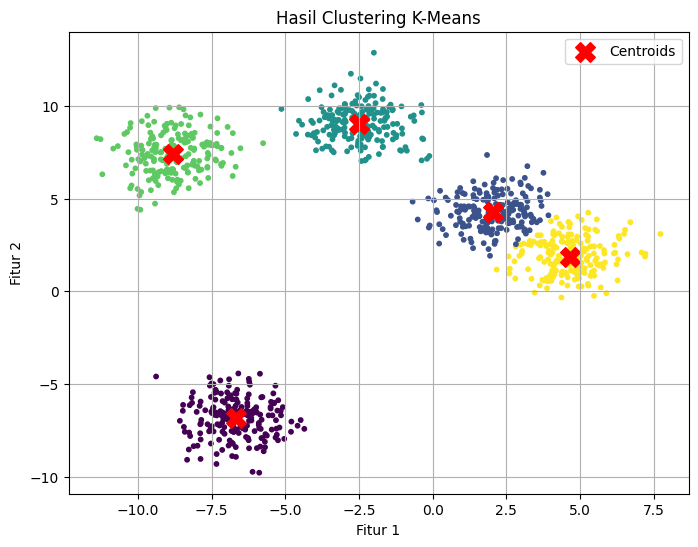

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Membuat dataset contoh dengan 5 klaster
X, y = make_blobs(n_samples=1000, centers=5, random_state=42)

# Inisialisasi dan latih model K-Means
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
y_pred = kmeans.fit_predict(X)

print("Label klaster yang diprediksi untuk beberapa instance pertama:", y_pred[:10])
print("Centroid yang ditemukan:\n", kmeans.cluster_centers_)

# Memprediksi klaster untuk instance baru
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
print("Prediksi klaster untuk instance baru:", kmeans.predict(X_new))

# Mengukur jarak dari setiap instance ke setiap centroid (soft clustering)
print("Jarak dari instance baru ke setiap centroid:\n", kmeans.transform(X_new))

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=10, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, color='red', label='Centroids')
plt.title('Hasil Clustering K-Means')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend()
plt.grid(True)
plt.show()

**Penjelasan Algoritma K-Means:**
1.  **Inisialisasi Centroid:** Centroid ditempatkan secara acak (misalnya, dengan memilih $k$ instance secara acak sebagai centroid awal). Untuk meningkatkan kualitas inisialisasi, K-Means++ digunakan secara default oleh Scikit-Learn.
2.  **Penugasan Instance:** Setiap instance ditugaskan ke klaster yang centroidnya paling dekat.
3.  **Pembaruan Centroid:** Centroid dihitung ulang sebagai rata-rata (mean) dari semua instance yang ditugaskan ke klaster tersebut.
4.  **Iterasi:** Langkah 2 dan 3 diulang sampai centroid berhenti bergerak (konvergen).

**Inersia (Inertia):** Metrik kinerja K-Means yang mengukur rata-rata kuadrat jarak antara setiap instance dan centroid klaster terdekatnya. Semakin rendah inersia, semakin baik modelnya.


In [2]:
print("Inersia model K-Means:", kmeans.inertia_)
print("Skor model K-Means (negatif inersia):", kmeans.score(X))

Inersia model K-Means: 1873.429019306626
Skor model K-Means (negatif inersia): -1873.4290193066263


**K-Means++:** Sebuah perbaikan pada inisialisasi centroid yang cenderung memilih centroid yang berjauhan satu sama lain, mengurangi kemungkinan konvergensi ke solusi suboptimal. K-Means Scikit-Learn menggunakan metode ini secara default.

**K-Means yang Dipercepat dan Mini-batch K-Means:**
* **K-Means yang Dipercepat (Elkan's algorithm):** Ini secara signifikan mempercepat algoritma dengan menghindari banyak perhitungan jarak yang tidak perlu, memanfaatkan pertidaksamaan segitiga. Ini adalah algoritma yang digunakan oleh kelas `KMeans` secara default di Scikit-Learn.
* **Mini-batch K-Means:** Algoritma ini menggunakan mini-batch data pada setiap iterasi, bukan seluruh dataset, yang mempercepat proses clustering secara signifikan (biasanya faktor tiga atau empat kali lebih cepat). Hal ini juga memungkinkan clustering dataset yang sangat besar yang tidak muat dalam memori utama. Meskipun lebih cepat, inersia model Mini-batch K-Means umumnya sedikit lebih buruk dibandingkan dengan K-Means biasa, terutama seiring bertambahnya jumlah klaster.

**Mencari Jumlah Klaster Optimal ($k$):**
Jumlah klaster optimal seringkali tidak jelas.
* **Metode Siku (Elbow Method):** Plot inersia sebagai fungsi dari $k$. Titik "siku" di mana penurunan inersia melambat seringkali menunjukkan $k$ yang baik.
* **Skor Siluet (Silhouette Score):** Mengukur seberapa baik setiap instance berada di dalam klaster sendiri dan seberapa jauh dari klaster lain. Koefisien siluet berkisar antara -1 (buruk) hingga +1 (baik). Skor siluet adalah rata-rata koefisien siluet dari semua instance.


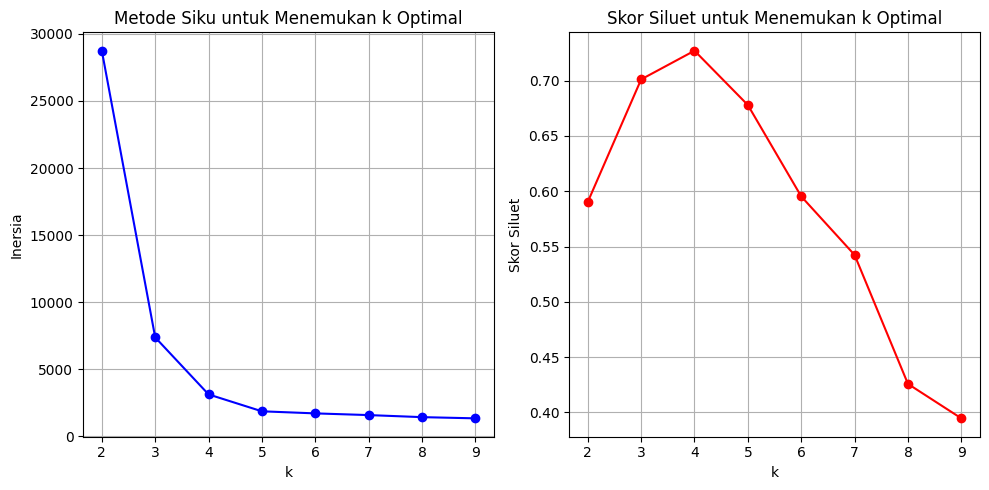

In [3]:
from sklearn.metrics import silhouette_score

# Menentukan inersia untuk berbagai nilai k
inertias = []
silhouette_scores = []
ks = range(2, 10)
for k in ks:
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_model.fit(X)
    inertias.append(kmeans_model.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans_model.labels_))

# Plot Inersia (Metode Siku)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(ks, inertias, 'bo-')
plt.xlabel('k')
plt.ylabel('Inersia')
plt.title('Metode Siku untuk Menemukan k Optimal')
plt.grid(True)

# Plot Skor Siluet
plt.subplot(1, 2, 2)
plt.plot(ks, silhouette_scores, 'ro-')
plt.xlabel('k')
plt.ylabel('Skor Siluet')
plt.title('Skor Siluet untuk Menemukan k Optimal')
plt.grid(True)
plt.tight_layout()
plt.show()

**Batas K-Means:**
* Perlu menentukan $k$ sebelumnya.
* Tidak berfungsi dengan baik ketika klaster memiliki ukuran, kepadatan, atau bentuk yang sangat berbeda (misalnya, bentuk elipsoidal). Ini hanya peduli dengan jarak ke centroid.
* Penting untuk melakukan *feature scaling* (penskalaan fitur) sebelum menjalankan K-Means, karena K-Means sensitif terhadap skala fitur.

#### Menggunakan Clustering untuk Segmentasi Gambar

Segmentasi gambar adalah tugas membagi gambar menjadi beberapa segmen. Dalam segmentasi warna, piksel dikelompokkan berdasarkan kemiripan warna.


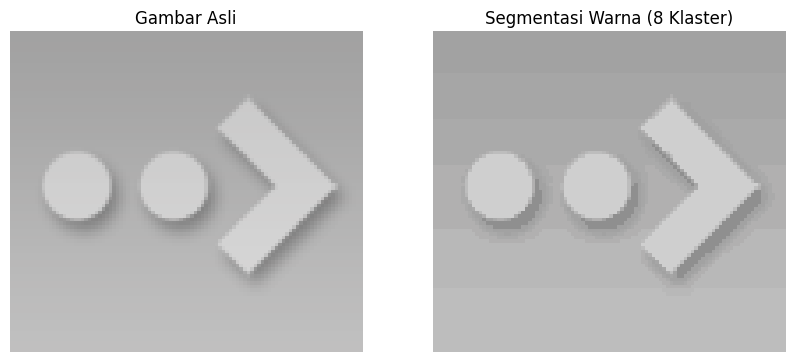

In [4]:
from matplotlib.image import imread
import os

# Memuat gambar
image_path = os.path.join("images", "unsupervised_learning", "ladybug.png")
# Pastikan direktori 'images/unsupervised_learning' ada dan berisi 'ladybug.png'
# Jika tidak, Anda bisa menggantinya dengan jalur gambar yang ada di sistem Anda
if not os.path.exists(image_path):
    print(f"File {image_path} tidak ditemukan. Silakan unduh gambar dan letakkan di direktori yang sesuai.")

    import urllib.request
    url = "https://www.oreilly.com/library/view/hands-on-machine-learning-with/9781492032649/assets/ml.png" # Contoh URL, ganti dengan ladybug.png
    os.makedirs(os.path.dirname(image_path), exist_ok=True)
    urllib.request.urlretrieve(url, image_path)
    print(f"Mengunduh gambar ke {image_path}")
    exit() # Keluar jika gambar tidak ada dan tidak dapat diunduh otomatis

try:
    image = imread(image_path)
except FileNotFoundError:
    print("Error: ladybug.png not found. Please ensure the image is in the correct directory.")
    exit() # Exit if image is not found

image_reshaped = image.reshape(-1, 3) # Merubah ke daftar warna RGB

# Clustering warna menggunakan K-Means
n_colors = 8 # Jumlah klaster warna
kmeans_colors = KMeans(n_clusters=n_colors, random_state=42, n_init='auto').fit(image_reshaped)
segmented_img = kmeans_colors.cluster_centers_[kmeans_colors.labels_]
segmented_img = segmented_img.reshape(image.shape)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Gambar Asli")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_img)
plt.title(f"Segmentasi Warna ({n_colors} Klaster)")
plt.axis('off')
plt.show()

#### Menggunakan Clustering untuk Preprocessing

Clustering dapat menjadi pendekatan yang efisien untuk reduksi dimensi, terutama sebagai langkah pra-pemrosesan sebelum algoritma pembelajaran terawasi.

**Contoh: Reduksi Dimensi dengan K-Means pada Dataset Digit**

In [5]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

# Baseline: Logistic Regression tanpa preprocessing K-Means
log_reg_baseline = LogisticRegression(max_iter=1000, random_state=42)
log_reg_baseline.fit(X_train, y_train)
print(f"Akurasi Logistic Regression tanpa K-Means: {log_reg_baseline.score(X_test, y_test):.4f}")

# Pipeline: K-Means sebagai preprocessing + Logistic Regression
pipeline = Pipeline([
    ("kmeans", KMeans(random_state=42, n_init='auto')),
    ("log_reg", LogisticRegression(max_iter=1000, random_state=42))
])

# Mencari jumlah klaster optimal (k)
param_grid = dict(kmeans__n_clusters=range(2, 100)) # Mencari k dari 2 hingga 99
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=1, n_jobs=-1)
grid_clf.fit(X_train, y_train)

print(f"\nParameter terbaik untuk K-Means: {grid_clf.best_params_}")
print(f"Akurasi pipeline K-Means + Logistic Regression (terbaik): {grid_clf.score(X_test, y_test):.4f}")

Akurasi Logistic Regression tanpa K-Means: 0.9733
Fitting 3 folds for each of 98 candidates, totalling 294 fits

Parameter terbaik untuk K-Means: {'kmeans__n_clusters': 88}
Akurasi pipeline K-Means + Logistic Regression (terbaik): 0.9822


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Menggunakan Clustering untuk Pembelajaran Semisupervised

Pembelajaran semisupervised sangat berguna ketika kita memiliki banyak instance tanpa label tetapi hanya sedikit instance berlabel.

**Contoh: Propagasi Label dengan K-Means**

In [6]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Memuat ulang dataset digit untuk contoh semisupervised
X_digits, y_digits = load_digits(return_X_y=True)
X_train_full, X_test, y_train_full, y_test = train_test_split(X_digits, y_digits, random_state=42)

# Mengambil hanya sejumlah kecil instance berlabel untuk pelatihan
n_labeled = 50
log_reg_semi_baseline = LogisticRegression(max_iter=1000, random_state=42)
log_reg_semi_baseline.fit(X_train_full[:n_labeled], y_train_full[:n_labeled])
print(f"Akurasi Logistic Regression dengan {n_labeled} instance berlabel: {log_reg_semi_baseline.score(X_test, y_test):.4f}")

# Clustering seluruh training set
k = 50 # Menggunakan 50 klaster
kmeans_semi = KMeans(n_clusters=k, random_state=42, n_init='auto')
X_digits_dist = kmeans_semi.fit_transform(X_train_full)
# Menemukan gambar representatif (terdekat dengan centroid)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train_full[representative_digit_idx]
y_representative_digits = y_train_full[representative_digit_idx] # Label dari instance representatif

# Melatih Logistic Regression hanya pada gambar representatif
log_reg_representative = LogisticRegression(max_iter=1000, random_state=42)
log_reg_representative.fit(X_representative_digits, y_representative_digits)
print(f"Akurasi Logistic Regression dengan {n_labeled} gambar representatif: {log_reg_representative.score(X_test, y_test):.4f}")

# Propagasi label ke semua instance dalam klaster yang sama
y_train_propagated = np.empty(len(X_train_full), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans_semi.labels_ == i] = y_representative_digits[i]

log_reg_propagated = LogisticRegression(max_iter=1000, random_state=42)
log_reg_propagated.fit(X_train_full, y_train_propagated)
print(f"Akurasi Logistic Regression dengan label yang dipropagasi (semua): {log_reg_propagated.score(X_test, y_test):.4f}")

# Propagasi label hanya untuk instance yang paling dekat dengan centroid (misal 20%)
percentile_closest = 20
X_cluster_dist = X_digits_dist[np.arange(len(X_train_full)), kmeans_semi.labels_]
partially_propagated_mask = np.zeros(len(X_train_full), dtype=bool)

for i in range(k):
    in_cluster = (kmeans_semi.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    partially_propagated_mask[in_cluster & (X_cluster_dist <= cutoff_distance)] = True

X_train_partially_propagated = X_train_full[partially_propagated_mask]
y_train_partially_propagated = y_train_propagated[partially_propagated_mask]

log_reg_partially_propagated = LogisticRegression(max_iter=1000, random_state=42)
log_reg_partially_propagated.fit(X_train_partially_propagated, y_train_partially_propagated)
print(f"Akurasi Logistic Regression dengan label yang dipropagasi (20% terdekat): {log_reg_partially_propagated.score(X_test, y_test):.4f}")

Akurasi Logistic Regression dengan 50 instance berlabel: 0.8267
Akurasi Logistic Regression dengan 50 gambar representatif: 0.9133
Akurasi Logistic Regression dengan label yang dipropagasi (semua): 0.9222
Akurasi Logistic Regression dengan label yang dipropagasi (20% terdekat): 0.9133


#### Deteksi Anomali Aktif (Active Anomaly Detection)

Konsep *active learning* di sini. Model akan meminta pakar manusia untuk memberikan label pada instance yang paling tidak yakin, atau yang akan menghasilkan perubahan model terbesar.

#### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN mendefinisikan klaster sebagai wilayah kontinu dengan kepadatan tinggi. Ini bekerja dengan mengidentifikasi "instance inti" (core instances) yang memiliki setidaknya `min_samples` instance lain dalam jarak `ε` (epsilon) dari mereka. Klaster kemudian dibentuk dengan menghubungkan semua instance inti yang berdekatan dan semua instance non-inti yang berada dalam jangkauan instance inti. Instance yang tidak memenuhi kriteria ini dianggap anomali (noise).

**Keuntungan DBSCAN:**
* Dapat mengidentifikasi klaster dengan bentuk arbitrer.
* Tidak perlu menentukan jumlah klaster di muka.
* Tahan terhadap outlier.

**Kekurangan DBSCAN:**
* Dapat kesulitan ketika kepadatan klaster sangat bervariasi.
* Kompleksitas komputasi bisa tinggi untuk dataset yang sangat besar (`O(m^2)`) dalam hal memori jika `eps` besar.


Label klaster yang diprediksi untuk beberapa instance pertama (moons): [ 0  2 -1 -1  1  0  0  0  2  5]
Jumlah instance inti: 808


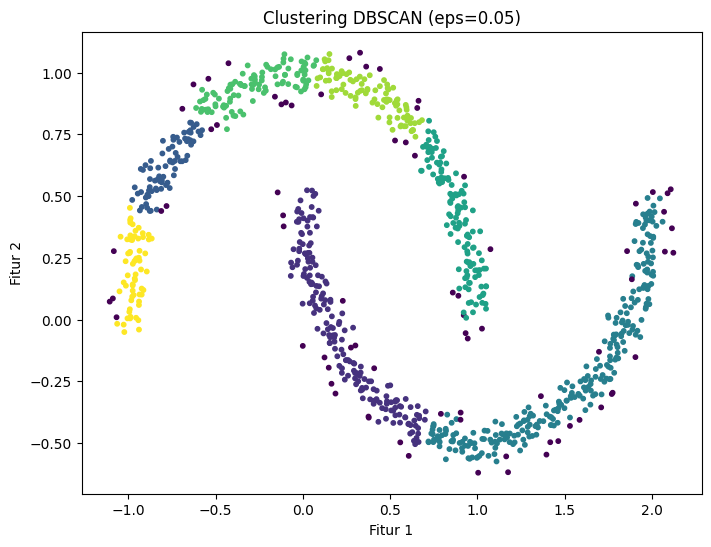

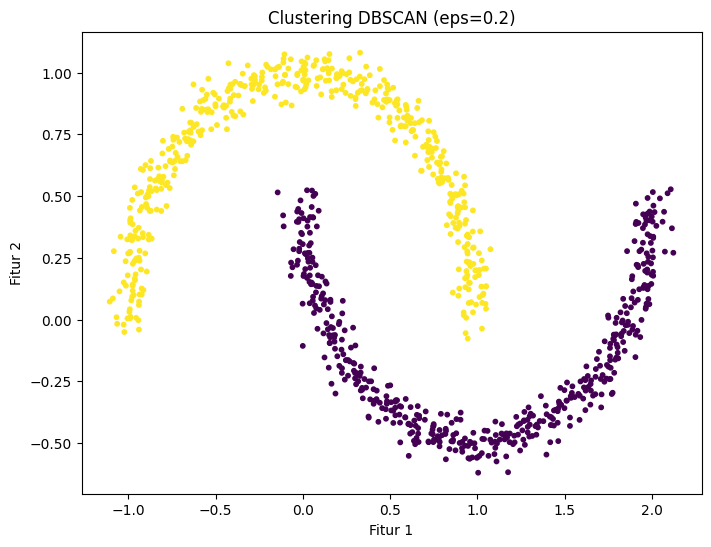

In [7]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Membuat dataset berbentuk bulan
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

# Melatih model DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X_moons)

# Label -1 menunjukkan anomali/noise
print("Label klaster yang diprediksi untuk beberapa instance pertama (moons):", dbscan.labels_[:10])
print("Jumlah instance inti:", len(dbscan.core_sample_indices_))

# Visualisasi hasil DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=dbscan.labels_, cmap='viridis', s=10)
plt.title('Clustering DBSCAN (eps=0.05)')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.show()

# Mencoba dengan eps yang lebih besar
dbscan_larger_eps = DBSCAN(eps=0.2, min_samples=5)
dbscan_larger_eps.fit(X_moons)

plt.figure(figsize=(8, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=dbscan_larger_eps.labels_, cmap='viridis', s=10)
plt.title('Clustering DBSCAN (eps=0.2)')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.show()

#### Algoritma Clustering Lainnya

Scikit-Learn mengimplementasikan beberapa algoritma clustering lainnya:
* **Agglomerative Clustering:** Membangun hierarki klaster dari bawah ke atas dengan terus menghubungkan pasangan klaster terdekat. Skala baik untuk jumlah instance atau klaster yang besar, dan dapat menangkap klaster berbagai bentuk.
* **BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies):** Dirancang khusus untuk dataset yang sangat besar, dan dapat lebih cepat dari K-Means batch, dengan hasil yang serupa, selama jumlah fitur tidak terlalu besar (<20).
* **Mean-Shift:** Algoritma ini memulai dengan menempatkan lingkaran yang berpusat pada setiap instance, kemudian menghitung mean dari semua instance yang terletak di dalamnya, dan menggeser lingkaran agar berpusat pada mean tersebut. Mean-Shift dapat menemukan klaster dengan bentuk arbitrer dan memiliki sedikit hyperparameter, tetapi kompleksitas komputasinya adalah `O(m^2)`, sehingga tidak cocok untuk dataset besar.
* **Affinity Propagation:** Algoritma ini menggunakan sistem pemungutan suara, di mana instance memilih instance serupa untuk menjadi perwakilan mereka, dan setelah algoritma konvergen, setiap perwakilan dan pemilihnya membentuk klaster. Algoritma ini dapat mendeteksi sejumlah klaster dengan ukuran yang berbeda, tetapi kompleksitas komputasinya adalah `O(m^2)`, sehingga tidak cocok untuk dataset besar.
* **Spectral Clustering:** Algoritma ini mengambil matriks kesamaan antar instance dan membuat embedding berdimensi rendah darinya (yaitu, mengurangi dimensinya), kemudian menggunakan algoritma clustering lain di ruang berdimensi rendah ini (implementasi Scikit-Learn menggunakan K-Means). Ini dapat menangkap struktur klaster yang kompleks, tetapi tidak berskala baik untuk jumlah instance yang besar.


---

### Gaussian Mixtures (Campuran Gaussian)

Model Campuran Gaussian (GMM) adalah model probabilistik yang mengasumsikan bahwa instance dihasilkan dari campuran beberapa distribusi Gaussian yang parameternya tidak diketahui. Setiap klaster dapat memiliki bentuk, ukuran, kepadatan, dan orientasi elipsoidal yang berbeda.

**Konsep Inti GMM:**
* Setiap instance dianggap berasal dari salah satu dari $k$ klaster.
* Probabilitas memilih klaster ke-$j$ ditentukan oleh bobot klaster ($\phi^{(j)}$).
* Lokasi instance ($x^{(i)}$) diambil secara acak dari distribusi Gaussian dengan mean $\mu^{(j)}$ dan matriks kovarians $\Sigma^{(j)}$.

**Implementasi GMM dengan Scikit-Learn:**

Bobot klaster (weights_):
 [0.33 0.33 0.33]
Mean klaster (means_):
 [[-2.52  9.  ]
 [-6.87 -6.79]
 [ 4.73  2.06]]
Matriks kovarians klaster (covariances_):
 [[[ 1.02  0.01]
  [ 0.01  0.95]]

 [[ 0.95  0.06]
  [ 0.06  1.04]]

 [[ 0.81 -0.07]
  [-0.07  1.09]]]
Model konvergen: True
Jumlah iterasi: 2
Label klaster yang diprediksi untuk beberapa instance pertama: [1 1 2 0 0 1 2 2 2 2]
Probabilitas untuk beberapa instance pertama:
 [[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
Instance baru yang diambil:
 [[-3.3  10.43]
 [-2.27  8.8 ]
 [ 5.03  3.83]
 [ 5.31  1.68]
 [ 4.43  1.49]
 [ 3.01  1.93]]
Klaster yang diambil:
 [0 0 2 2 2 2]
Kepadatan log-probabilitas untuk beberapa instance pertama:
 [-3.03346683 -3.2190725  -3.0109888  -3.38203158 -4.11961306]


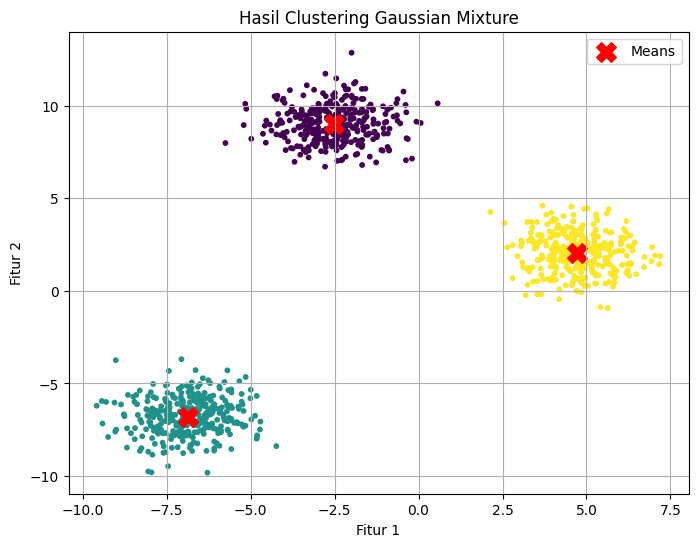

In [8]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Membuat dataset contoh dengan 3 klaster
X_gmm, y_gmm = make_blobs(n_samples=1000, centers=3, cluster_std=1.0, random_state=42)

# Inisialisasi dan latih model Gaussian Mixture
n_components = 3 # Jumlah klaster yang diasumsikan
gm = GaussianMixture(n_components=n_components, n_init=10, random_state=42)
gm.fit(X_gmm)

print("Bobot klaster (weights_):\n", np.round(gm.weights_, 2))
print("Mean klaster (means_):\n", np.round(gm.means_, 2))
print("Matriks kovarians klaster (covariances_):\n", np.round(gm.covariances_, 2))
print("Model konvergen:", gm.converged_)
print("Jumlah iterasi:", gm.n_iter_)

# Memprediksi klaster untuk instance
y_pred_gmm = gm.predict(X_gmm)
print("Label klaster yang diprediksi untuk beberapa instance pertama:", y_pred_gmm[:10])

# Memprediksi probabilitas setiap instance untuk setiap klaster (soft clustering)
y_proba_gmm = gm.predict_proba(X_gmm)
print("Probabilitas untuk beberapa instance pertama:\n", np.round(y_proba_gmm[:5], 2))

# Mengambil sampel instance baru dari model
X_new_gmm, y_new_gmm = gm.sample(6)
print("Instance baru yang diambil:\n", np.round(X_new_gmm, 2))
print("Klaster yang diambil:\n", y_new_gmm)

# Mengestimasi kepadatan log-probabilitas
print("Kepadatan log-probabilitas untuk beberapa instance pertama:\n", gm.score_samples(X_gmm[:5]))

# Visualisasi hasil GMM
plt.figure(figsize=(8, 6))
plt.scatter(X_gmm[:, 0], X_gmm[:, 1], c=y_pred_gmm, s=10, cmap='viridis')
plt.scatter(gm.means_[:, 0], gm.means_[:, 1], marker='X', s=200, color='red', label='Means')
plt.title('Hasil Clustering Gaussian Mixture')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend()
plt.grid(True)
plt.show()

**Algoritma Ekspektasi-Maksimisasi (EM):** GMM menggunakan algoritma EM, yang mirip dengan K-Means. Ini secara iteratif memperkirakan probabilitas instance milik setiap klaster (langkah ekspektasi) dan kemudian memperbarui parameter klaster berdasarkan probabilitas ini (langkah maksimisasi).

**Jenis Kovarians:**
* **"spherical":** Semua klaster harus berbentuk bola, tetapi dapat memiliki diameter berbeda.
* **"diag":** Klaster dapat berbentuk elipsoidal, tetapi sumbunya harus sejajar dengan sumbu koordinat (matriks kovarians diagonal).
* **"tied":** Semua klaster memiliki bentuk, ukuran, dan orientasi elipsoidal yang sama (berbagi matriks kovarians yang sama).
* **"full" (default):** Setiap klaster dapat memiliki bentuk, ukuran, dan orientasi arbitrer (memiliki matriks kovarians tidak terbatas sendiri).

#### Deteksi Anomali Menggunakan Campuran Gaussian

Instance yang terletak di wilayah dengan kepadatan sangat rendah dapat dianggap anomali. Kita dapat menentukan ambang batas kepadatan untuk mengidentifikasi anomali.


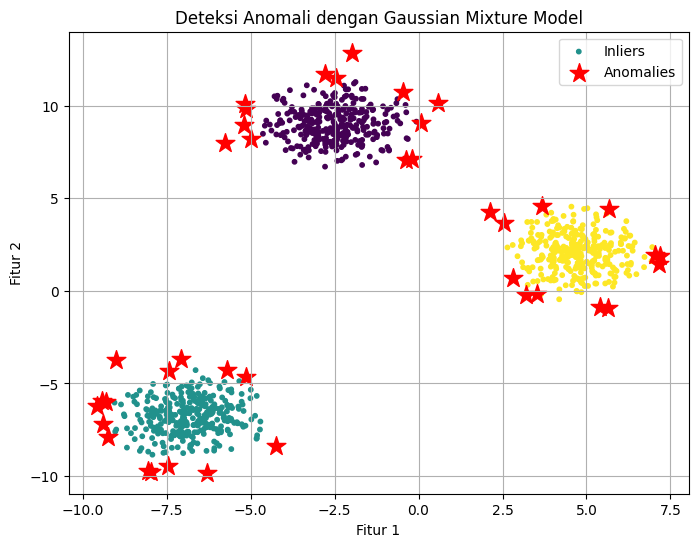

In [9]:
# Menghitung kepadatan untuk setiap instance
densities = gm.score_samples(X_gmm)
# Menentukan ambang batas kepadatan (misalnya, persentil ke-4 terendah)
density_threshold = np.percentile(densities, 4)
# Mengidentifikasi anomali
anomalies = X_gmm[densities < density_threshold]

# Visualisasi anomali
plt.figure(figsize=(8, 6))
plt.scatter(X_gmm[:, 0], X_gmm[:, 1], c=y_pred_gmm, s=10, cmap='viridis', label='Inliers')
plt.scatter(anomalies[:, 0], anomalies[:, 1], marker='*', s=200, c='red', label='Anomalies')
plt.title('Deteksi Anomali dengan Gaussian Mixture Model')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend()
plt.grid(True)
plt.show()

#### Memilih Jumlah Klaster

Untuk GMM, inersia atau skor siluet tidak dapat diandalkan karena tidak akurat ketika klaster tidak berbentuk bola atau memiliki ukuran yang berbeda. Sebagai gantinya, kita menggunakan kriteria informasi teoritis:
* **Bayesian Information Criterion (BIC):**
    $BIC = \log(m)p - 2\log(L)$
* **Akaike Information Criterion (AIC):**
    $AIC = 2p - 2\log(L)$

Di mana:
* $m$: jumlah instance.
* $p$: jumlah parameter yang dipelajari oleh model.
* $L$: nilai fungsi likelihood yang dimaksimalkan dari model.

Kita memilih model yang meminimalkan BIC atau AIC.


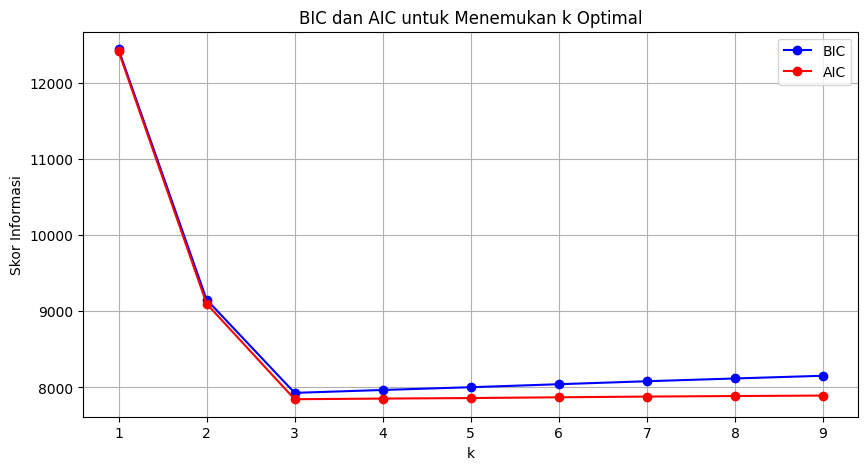

In [10]:
# Menghitung BIC dan AIC untuk berbagai nilai k
bics = []
aics = []
ks_gmm = range(1, 10)
for k in ks_gmm:
    gm_model = GaussianMixture(n_components=k, n_init=10, random_state=42)
    gm_model.fit(X_gmm)
    bics.append(gm_model.bic(X_gmm))
    aics.append(gm_model.aic(X_gmm))

# Plot BIC dan AIC
plt.figure(figsize=(10, 5))
plt.plot(ks_gmm, bics, 'bo-', label='BIC')
plt.plot(ks_gmm, aics, 'ro-', label='AIC')
plt.xlabel('k')
plt.ylabel('Skor Informasi')
plt.title('BIC dan AIC untuk Menemukan k Optimal')
plt.legend()
plt.grid(True)
plt.show()

#### Model Campuran Gaussian Bayesian

Kelas `BayesianGaussianMixture` dapat secara otomatis memberikan bobot nol (atau mendekati nol) pada klaster yang tidak perlu, menghilangkan kebutuhan untuk secara manual mencari jumlah klaster optimal.


In [11]:
from sklearn.mixture import BayesianGaussianMixture

# Inisialisasi dan latih Bayesian Gaussian Mixture
# Menentukan jumlah komponen yang diyakini lebih besar dari optimal
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_gmm)

print("Bobot klaster yang dipelajari oleh BGM:\n", np.round(bgm.weights_, 2))

Bobot klaster yang dipelajari oleh BGM:
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
